<h2> Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import TruncatedSVD
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer, confusion_matrix, roc_curve, auc
from sklearn.inspection import permutation_importance
import shap 

## Read data

In [3]:
# Read train data and display head 
train = pd.read_csv('data/train.csv')
train.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,2,0,2,0,1,0,4,...,0,0,1,0,0,1,0,4,0,1
1,1,1,1,0,0,2,0,1,1,1,...,1,1,0,0,0,0,1,4,2,0
2,1,0,1,1,1,3,1,0,2,1,...,1,0,1,0,1,0,0,4,2,2
3,1,0,0,1,0,0,1,0,2,2,...,0,0,1,0,0,0,1,3,2,1
4,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,4,0,1


In [4]:
# Read test data and display head 
test = pd.read_csv('data/test.csv')
test.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,0,0,3,0,0,0,0,...,1,0,0,1,0,1,0,4,1,1
1,1,1,1,0,0,3,1,0,1,1,...,1,0,1,0,1,0,0,3,0,2
2,0,0,0,0,0,2,1,0,1,1,...,1,0,1,0,0,1,0,3,2,1
3,0,1,1,0,0,3,0,0,1,1,...,0,0,1,0,1,0,0,1,1,2
4,1,1,0,0,0,0,0,0,1,3,...,1,0,1,0,0,0,1,1,1,1


In [5]:
x_train = train.drop('fraud', axis=1)
y_train = train['fraud'].values
x_train.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,age,safety_grade,annual_income_category,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,2,0,2,0,0,4,0,...,0,0,1,0,0,1,0,4,0,1
1,1,1,1,0,0,2,0,1,1,3,...,1,1,0,0,0,0,1,4,2,0
2,1,0,1,1,1,3,1,2,1,4,...,1,0,1,0,1,0,0,4,2,2
3,1,0,0,1,0,0,1,2,2,3,...,0,0,1,0,0,0,1,3,2,1
4,1,1,0,0,0,0,0,1,1,1,...,1,0,0,1,1,0,0,4,0,1


In [6]:
x_test = test.drop('fraud', axis=1)
y_test = test['fraud'].values
x_test.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,age,safety_grade,annual_income_category,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,0,0,3,0,0,0,0,...,1,0,0,1,0,1,0,4,1,1
1,1,1,1,0,0,3,1,1,1,2,...,1,0,1,0,1,0,0,3,0,2
2,0,0,0,0,0,2,1,1,1,2,...,1,0,1,0,0,1,0,3,2,1
3,0,1,1,0,0,3,0,1,1,3,...,0,0,1,0,1,0,0,1,1,2
4,1,1,0,0,0,0,0,1,3,3,...,1,0,1,0,0,0,1,1,1,1


## 1. Gradient Boosting model

Firstly, we employ a gradient boosting model with the training data and evaluate its performance on the test set.

In [333]:
# Instantiate teh model
gb = GradientBoostingClassifier(random_state = 109)

# Train the model using the train sets
gb.fit(x_train, y_train)

# Predict the response for test dataset
y_pred_gb = gb.predict(x_test)

In [334]:
# Metrics
print('Accuracy Score',accuracy_score(y_test, y_pred_gb))
print('F-1 Score : ',(f1_score(y_test, y_pred_gb)))
print('Precision Score : ',(precision_score(y_test, y_pred_gb)))
print('Recall Score : ',(recall_score(y_test, y_pred_gb)))

Accuracy Score 0.845679012345679
F-1 Score :  0.05172413793103448
Precision Score :  0.5357142857142857
Recall Score :  0.02717391304347826


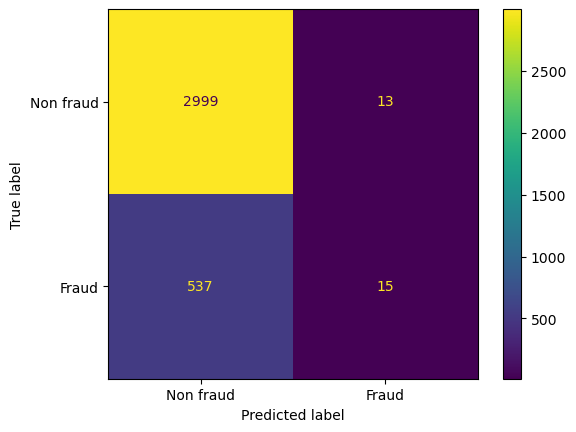

In [335]:
confusion_matrix_gb = metrics.confusion_matrix(y_test, y_pred_gb)
cm_display_gb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gb, display_labels = ['Non fraud', 'Fraud'])
cm_display_gb.plot()
plt.show()

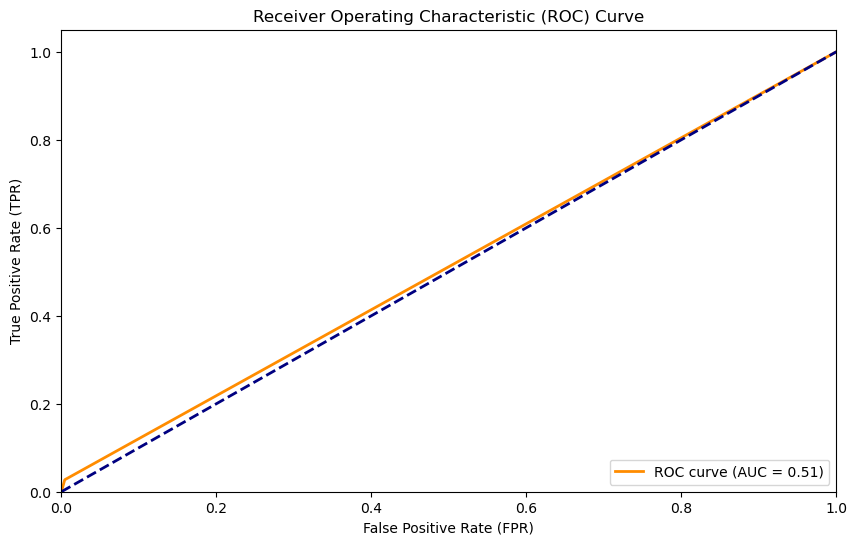

In [455]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From the results metrics, we can observe that although this model has a high accuracy of 0.845679012345679, it is not good at identifying the fraud cases, and the recall score is only 0.02717391304347826. which indicates that the model is missing a substantial portion of actual fraud instances. 

From the ROC curve, it is also evident that this model is not performing well as the graph overlaps with the line to a greater extent, and it only has an AUC of 0.51. This implies that the model is only performing slightly better than random guessing. Thus we need to explore ways to make improvements.

## 2. Gradient Boosting Model with Fine Tuning

We would like to first attempt to fine-tune the model by performing a GridSearchCV with score = 'recall' to see if this can improve the performance of the model in predicting fraud classes.

In [240]:
# Perform SVD to reduce the dimensionality of the data
svd = TruncatedSVD(n_components = 2)
x_train_reduced = svd.fit_transform(x_train)

# Define the parameter grid to search over
param_dist = {
    "learning_rate": [0.1, 0.05, 0.01, 0.001],
    "n_estimators": range(50, 201, 10),
    "max_depth": range(2, 11, 1)
}

gb_tuned = GridSearchCV(GradientBoostingClassifier(), param_dist, scoring='recall', cv = 5)
gb_tuned.fit(x_train_reduced, y_train)
print("Best hyperparameter: ", gb_tuned.best_params_)

Best hyperparameter:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 180}


In [241]:
# Tuned Gradient Boosting
#Instantiate the model
gb_tuned = GradientBoostingClassifier(n_estimators = gb_tuned.best_params_["n_estimators"],
                                max_depth = gb_tuned.best_params_["max_depth"],
                                learning_rate = gb_tuned.best_params_["learning_rate"],
                                random_state = 109)
# Train the model using the train sets
gb_tuned.fit(x_train, y_train)

# Predict the response for test dataset
y_pred_gb_tuned = gb_tuned.predict(x_test)

In [242]:
# Metrics
print('Accuracy Score',accuracy_score(y_test, y_pred_gb_tuned))
print('F-1 Score : ',(f1_score(y_test, y_pred_gb_tuned)))
print('Precision Score : ',(precision_score(y_test, y_pred_gb_tuned)))
print('Recall Score : ',(recall_score(y_test, y_pred_gb_tuned)))

Accuracy Score 0.8280022446689114
F-1 Score :  0.14265734265734265
Precision Score :  0.3128834355828221
Recall Score :  0.09239130434782608


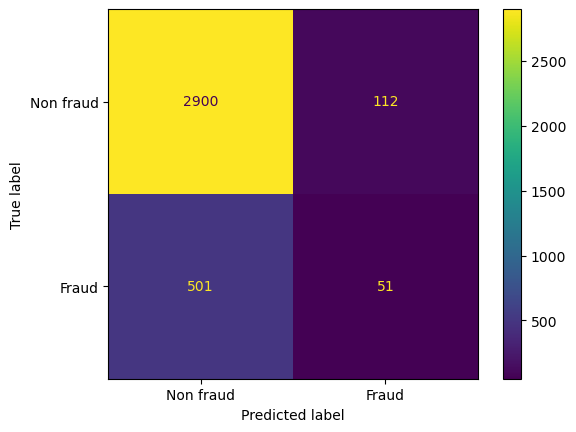

In [243]:
confusion_matrix_gb_tuned = metrics.confusion_matrix(y_test, y_pred_gb_tuned)
cm_display_gb_tuned = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gb_tuned, display_labels = ['Non fraud', 'Fraud'])
cm_display_gb_tuned.plot()
plt.show()

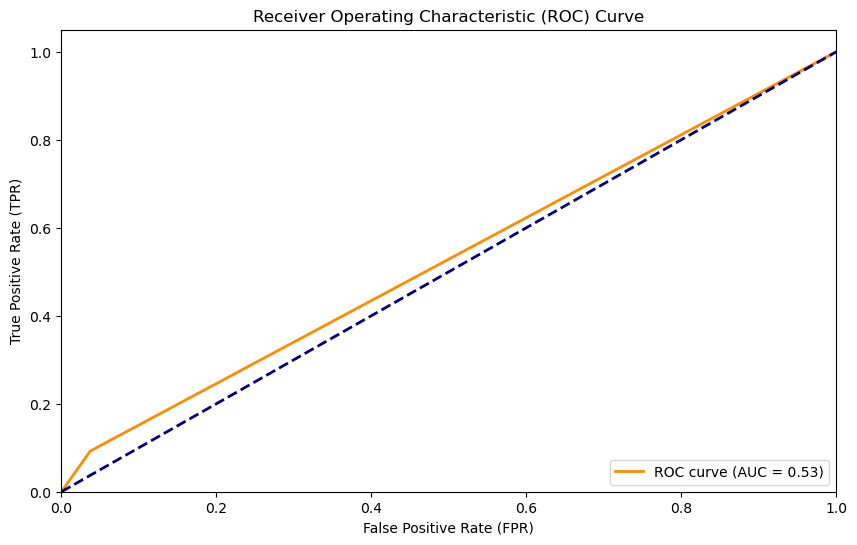

In [456]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_tuned)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We can observe that even after tuning with recall, the recall of the model is still very low, with a score of 0.09239130434782608, which indicates that the model is still missing a substantial portion of actual fraud instances. 

From the ROC curve, it is also evident that this model is also not performing well as the graph still overlaps with the line to a greater extent, and it only has an AUC of 0.53. This implies that the model is only performing slightly better than random guessing, and this cannot be solved simply by fine-tuning the model.

This can be attributed to the imbalance in the dataset. The count of non-fraud cases is far greater than the number of fraud cases, casuing the model to be biased toward the non-fraud class.

In order to address this issue of imbalance dataset, we apply SMOTE to the training set. 

## SMOTE

In [9]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

After applying SMOTE, the train dataset now includes synthetic instances of the minority class, and the imbalance is alleviated. This new balanced dataset is then used to train or fine-tune the gradient boosting model. 

## 3. Gradient Boosting Model on SMOTE Resampled training data

We will then used the SMOTE rebalanced data to perform further analysis.

Firstly, we employ a gradient boosting model with the resampled training data and evaluate its performance on the test set.

In [345]:
# Instantiate teh model
gb_resampled = GradientBoostingClassifier(random_state = 109)

# Train the model using the train sets
gb_resampled.fit(x_train_resampled, y_train_resampled)

# Predict the response for test dataset
y_pred_gb_resampled = gb_resampled.predict(x_test)

In [346]:
# Metrics
print('Accuracy Score',accuracy_score(y_test, y_pred_gb_resampled))
print('F-1 Score : ',(f1_score(y_test, y_pred_gb_resampled)))
print('Precision Score : ',(precision_score(y_test, y_pred_gb_resampled)))
print('Recall Score : ',(recall_score(y_test, y_pred_gb_resampled)))

Accuracy Score 0.7135241301907969
F-1 Score :  0.2973158981417756
Precision Score :  0.2397336293007769
Recall Score :  0.391304347826087


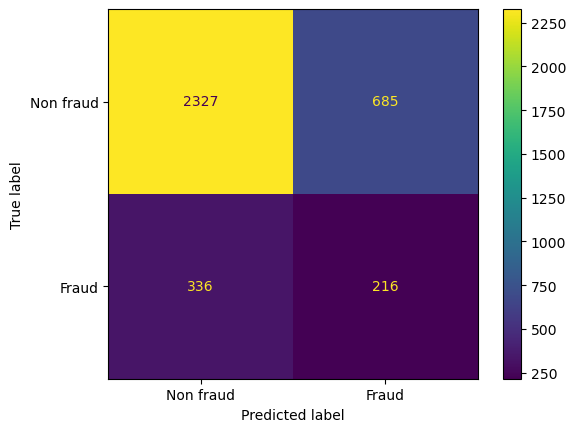

In [347]:
confusion_matrix_gb_resampled = metrics.confusion_matrix(y_test, y_pred_gb_resampled)
cm_display_gb_resampled = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gb_resampled, display_labels = ['Non fraud', 'Fraud'])
cm_display_gb_resampled.plot()
plt.show()

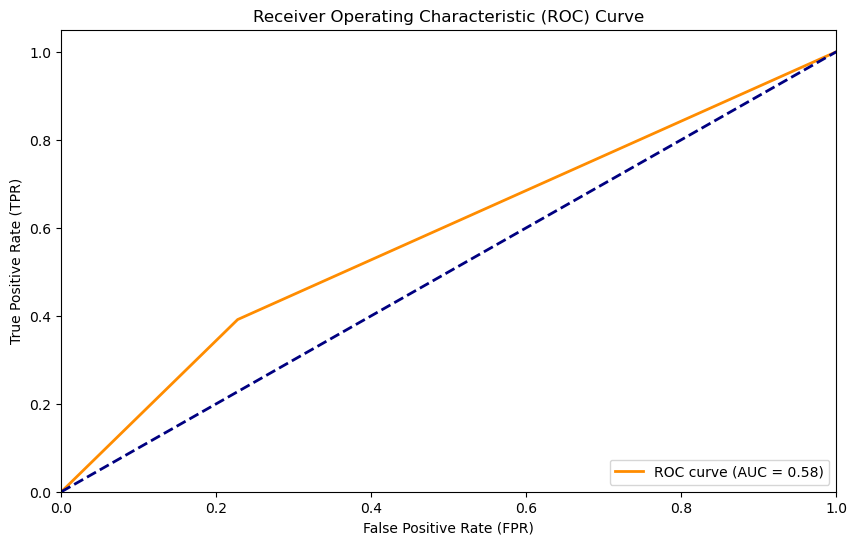

In [457]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_resampled)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

We can see that comparing to model 1 (gradient boosting using original train data and without tuning), the model has improved its performance significantly in accurately predicting fraud cases. The recall score has increased significantly from 0.02717391304347826 to 0.391304347826087. Meanwhile, the accuracy remained high with a score of 0.7135241301907969.

It is also evident from the ROC curve that the curve is significantly different from random guessing, and the AUC score has also increases to 0.58. This implied that using SMOTE-rebalanced training dataset can significantly improve the model performance.

## 4. Gradient Boosting Model on SMOTE Resampled training data with Fine Tuning

After verifying that using SMOTE-rebalanced training dataset can significantly improve the model's ability in predicting fraud cases. 

Next, we would like to explore how we can further improve this performance after fine tuning.

We would like to first attempt to fine-tune the model by performing a RandomizedSearchCV with score = 'recall' to see if this can improve the performance of the model in predicting fraud classes.

### Fine Tuning using recall

In [356]:
# Define the parameter grid to search over
param_dist = {
    "learning_rate": [0.1, 0.05, 0.01, 0.001],
    "n_estimators": range(50, 201, 10),
    "max_depth": range(2, 11, 1)
}

gb_resampled_tuned = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_dist, scoring= 'recall', n_iter = 20, cv = 5)
gb_resampled_tuned.fit(x_train_resampled, y_train_resampled)
print("Best hyperparameter: ", gb_resampled_tuned.best_params_)

Best hyperparameter:  {'n_estimators': 170, 'max_depth': 4, 'learning_rate': 0.001}


In [357]:
# Tuned Gradient Boosting
#Instantiate the model
gb_resampled_tuned = GradientBoostingClassifier(n_estimators = gb_resampled_tuned.best_params_["n_estimators"],
                                max_depth = gb_resampled_tuned.best_params_["max_depth"],
                                learning_rate = gb_resampled_tuned.best_params_["learning_rate"],
                                random_state = 109)
# Train the model using the train sets
gb_resampled_tuned.fit(x_train_resampled, y_train_resampled)

# Predict the response for test dataset
y_pred_gb_resampled_tuned = gb_resampled_tuned.predict(x_test)

In [360]:
print('Accuracy Score',accuracy_score(y_test, y_pred_gb_resampled_tuned))
print('F-1 Score : ',(f1_score(y_test, y_pred_gb_resampled_tuned)))
print('Precision Score : ',(precision_score(y_test, y_pred_gb_resampled_tuned)))
print('Recall Score : ',(recall_score(y_test, y_pred_gb_resampled_tuned)))

Accuracy Score 0.5838945005611672
F-1 Score :  0.3370585605721949
Precision Score :  0.22373887240356083
Recall Score :  0.6829710144927537


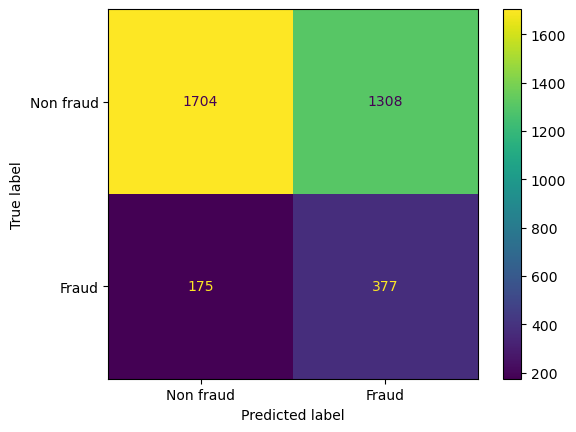

In [361]:
confusion_matrix_gb_tuned_resampled = metrics.confusion_matrix(y_test, y_pred_gb_resampled_tuned)
cm_display_gb_tuned_resampled = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gb_tuned_resampled, display_labels = ['Non fraud', 'Fraud'])
cm_display_gb_tuned_resampled.plot()
plt.show()

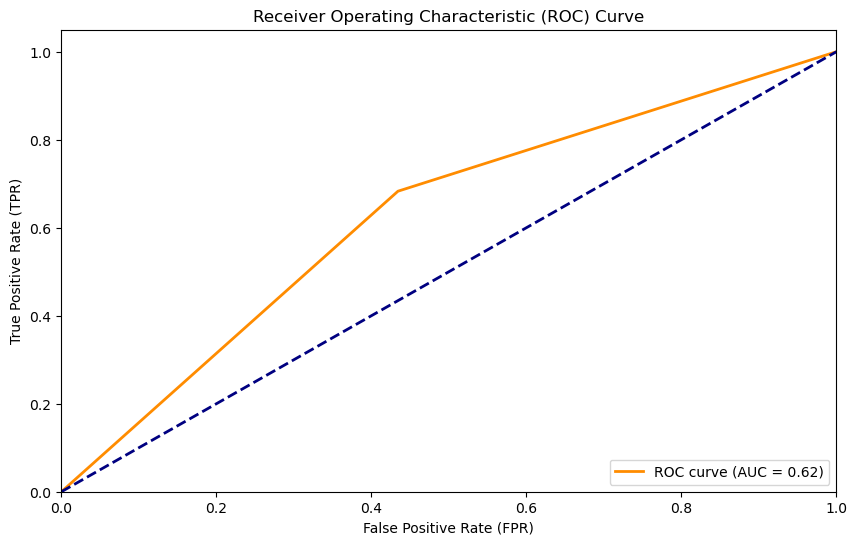

In [453]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_resampled_tuned)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From the metrics, we can see that fine-tuning can further improve the model's ability in predicting fraud cases. The recall score has increased to 0.6829710144927537, and the AUC score has increased to 0.62.

### Fine Tuning Using Customised Cost Function

Next, we would like to explore the model's performance after fine tuning using a customised cost matrix. 

This is because in real life, the cost of missclassifying class fraud as non fraud (cost of not identifying the frauder) is higher than the cost of missclassifying class non fraud as fraud (cost of investigation). Hence in this case, we set the cost of missclassifying class fraud as non fraud as 2, and cost of missclassifying class non fraud as fraud as 1. These numbers can be changed by the company using the real ratio in their context.

In [458]:
cost_matrix = np.array([[0, 1],  # Cost for misclassifying class non fraud as class fraud
                       [2, 0]])  # Cost for misclassifying class fraud as class non fraud

# Define a custom scoring function based on the cost matrix
def custom_cost_scoring(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    total_cost = np.sum(cm * cost_matrix)
    return -total_cost  # Minimize the negative cost

In [476]:
# Define the parameter grid to search over
param_dist = {
    "learning_rate": [0.1, 0.05, 0.01, 0.001],
    "n_estimators": range(50, 201, 10),
    "max_depth": range(2, 21, 1)
}

gb_resampled_cost = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions= param_dist, scoring= make_scorer(custom_cost_scoring, greater_is_better=False), n_iter= 20 ,cv = 5)
gb_resampled_cost.fit(x_train_resampled, y_train_resampled)
print("Best hyperparameter: ", gb_resampled_cost.best_params_)

Best hyperparameter:  {'n_estimators': 170, 'max_depth': 5, 'learning_rate': 0.001}


In [479]:
# Tuned Gradient Boosting
#Instantiate the model
gb_resampled_cost = GradientBoostingClassifier(n_estimators = gb_resampled_cost.best_params_["n_estimators"],
                                max_depth = gb_resampled_cost.best_params_["max_depth"],
                                learning_rate = gb_resampled_cost.best_params_["learning_rate"],
                                random_state = 109)
# Train the model using the train sets
gb_resampled_cost.fit(x_train_resampled, y_train_resampled)

# Predict the response for test dataset
y_pred_gb_resampled_cost = gb_resampled_cost.predict(x_test)

In [481]:
print('Accuracy Score',accuracy_score(y_test, y_pred_gb_resampled_cost))
print('F-1 Score : ',(f1_score(y_test, y_pred_gb_resampled_cost)))
print('Precision Score : ',(precision_score(y_test, y_pred_gb_resampled_cost)))
print('Recall Score : ',(recall_score(y_test, y_pred_gb_resampled_cost)))

Accuracy Score 0.6122334455667789
F-1 Score :  0.32847424684159376
Precision Score :  0.2244355909694555
Recall Score :  0.6123188405797102


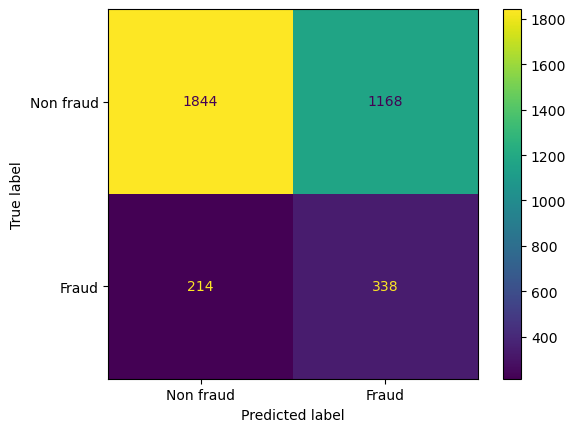

In [475]:
confusion_matrix_gb_tuned_resampled_cost = metrics.confusion_matrix(y_test, y_pred_gb_resampled_cost)
cm_display_gb_resampled_cost = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gb_tuned_resampled_cost, display_labels = ['Non fraud', 'Fraud'])
cm_display_gb_resampled_cost.plot()
plt.show()

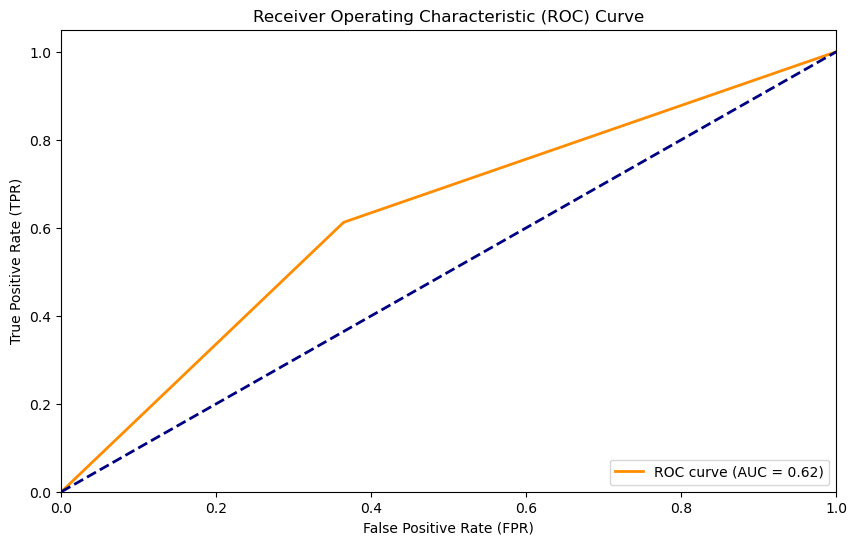

In [454]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_resampled_cost)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From the metrics, we can see that fine-tuning using the current cost matrix cannot further improve the model's ability in predicting fraud cases. The recall score has decreased from 0.6829710144927537 to 0.6123188405797102, and the AUC score remained 0.62.

This may be attributed to the fact that when fine-tuning the model to optimize the recall score, it essentially mirrors the effect of having a cost matrix with a high cost ratio. This ratio might be greater then the values in the current customized cost matrix. However, this approach is still meaningful as it allows the companies to simulate their real cost in misclassification for both classes, and eventually help them to minimise the overall investigation and false claim cost instead of simply minimising the false claim cost in fraud cases.

## 5. XGBoost Model on SMOTE Resampled training data

Next, we are interested in if we can further improve the model's performance using a more efficient implementation of gradient boosting. XGBoost, or Extreme Gradient Boosting, is an optimized and efficient implementation of gradient boosting. We use XGBoostClassifier in this section to assess the performance.

In [364]:
#Instantiate the model
xgb_resampled = XGBClassifier(random_state = 109)

# Train the model using the train sets
xgb_resampled.fit(x_train_resampled, y_train_resampled)

# Predict the response for test dataset
y_pred_xgb_resampled = xgb_resampled.predict(x_test)

In [365]:
print('Accuracy Score',accuracy_score(y_test, y_pred_xgb_resampled))
print('F-1 Score : ',(f1_score(y_test, y_pred_xgb_resampled)))
print('Precision Score : ',(precision_score(y_test, y_pred_xgb_resampled)))
print('Recall Score : ',(recall_score(y_test, y_pred_xgb_resampled)))

Accuracy Score 0.7592592592592593
F-1 Score :  0.2802013422818792
Precision Score :  0.2609375
Recall Score :  0.302536231884058


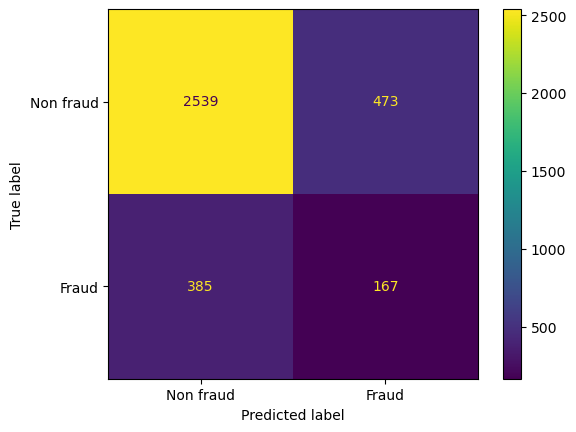

In [366]:
confusion_matrix_xgb_resampled = metrics.confusion_matrix(y_test, y_pred_xgb_resampled)
cm_display_xgb_resampled = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb_resampled, display_labels = ['Non fraud', 'Fraud'])
cm_display_xgb_resampled.plot()
plt.show()

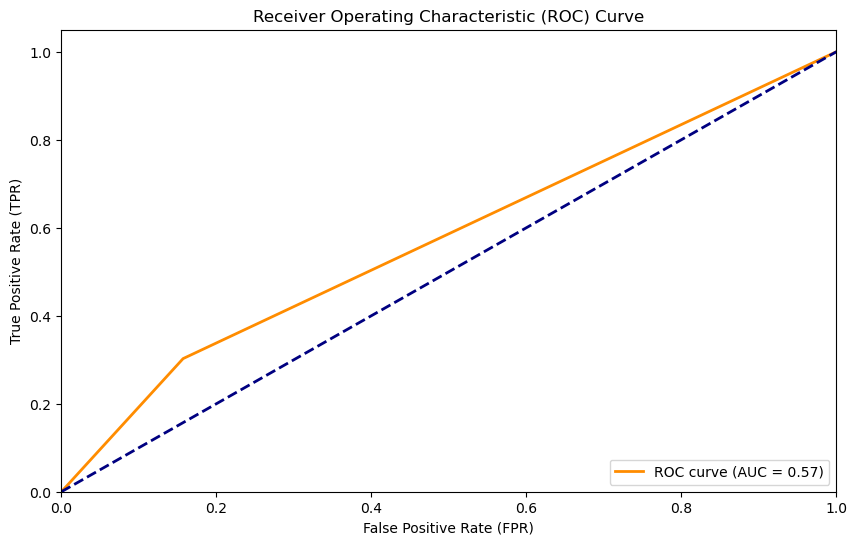

In [425]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_resampled)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From the performance of the XGBClassifier before fine tuning, we can see that it has the potential to perform better than the tradtional gradient boosting model.

After comparing to the gradient boosting model by both recall score and the AUC score, there is no significant improvement for XGBoost model, we can still see that its performance is compatible with the traditional gradient boosting model, hence we are interested in exploring if it can outperform the traditional gradient boosting model after fine tuning.

## 6. XGBoost Model on SMOTE Resampled training data with Fine Tuning

In [444]:
# Define the parameter grid to search over
param_dist = {
    "learning_rate": [0.1, 0.05, 0.01, 0.001],
    "n_estimators": range(50, 201, 10),
    "max_depth": range(2, 11, 1)
}

xgb_resampled_tuned = RandomizedSearchCV(XGBClassifier(), param_distributions= param_dist, scoring= make_scorer(recall_score), n_iter= 20 ,cv = 5)
xgb_resampled_tuned.fit(x_train_resampled, y_train_resampled)
print("Best hyperparameter: ", xgb_resampled_tuned.best_params_)

Best hyperparameter:  {'n_estimators': 170, 'max_depth': 3, 'learning_rate': 0.001}


In [445]:
# Tuned XGBoosting
#Instantiate the model
xgb_resampled_tuned = XGBClassifier(n_estimators = xgb_resampled_tuned.best_params_["n_estimators"],
                                max_depth = xgb_resampled_tuned.best_params_["max_depth"],
                                learning_rate = xgb_resampled_tuned.best_params_["learning_rate"],
                                random_state = 109)
# Train the model using the train sets
xgb_resampled_tuned.fit(x_train_resampled, y_train_resampled)

# Predict the response for test dataset
y_pred_xgb_resampled_tuned = xgb_resampled_tuned.predict(x_test)

In [477]:
print('Accuracy Score',accuracy_score(y_test, y_pred_xgb_resampled_tuned))
print('F-1 Score : ',(f1_score(y_test, y_pred_xgb_resampled_tuned)))
print('Precision Score : ',(precision_score(y_test, y_pred_xgb_resampled_tuned)))
print('Recall Score : ',(recall_score(y_test, y_pred_xgb_resampled_tuned)))

Accuracy Score 0.5794051627384961
F-1 Score :  0.3358440407620735
Precision Score :  0.22228739002932552
Recall Score :  0.6865942028985508


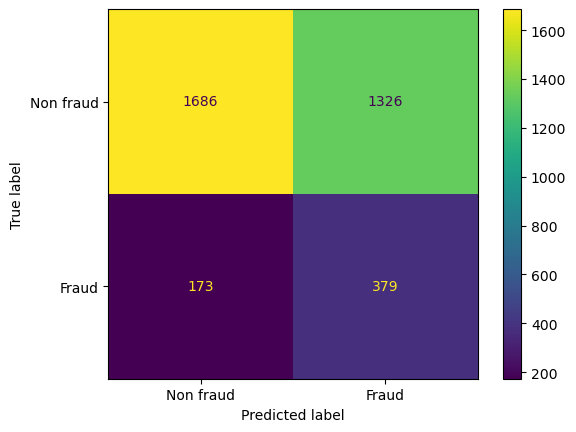

In [451]:
confusion_matrix_xgb_resampled_tuned = metrics.confusion_matrix(y_test, y_pred_xgb_resampled_tuned)
cm_display_xgb_resampled_tuned = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb_resampled_tuned, display_labels = ['Non fraud', 'Fraud'])
cm_display_xgb_resampled_tuned.plot()
plt.show()

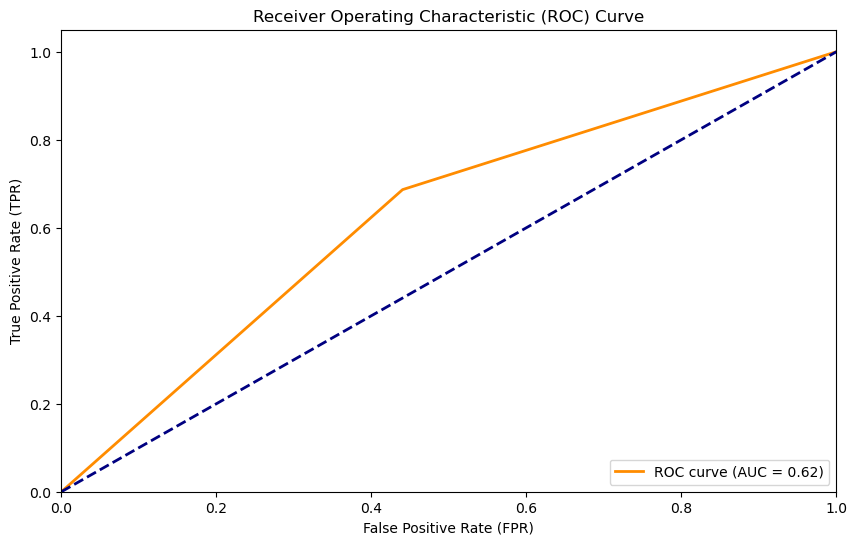

In [452]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb_resampled_tuned)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

From the metrics, we can see that fine-tuning can further improve the model's ability in predicting fraud cases. The performance of the XGBoost model is now slightly better than the traditional gradient boosting model. The recall score has increased from 0.6829710144927537 to 0.6865942028985508, and the AUC score remained 0.62. This indicates that the model is able to identify more fraud cases without having too much increase in the missclassification of non-fraud cases as fraud, which is desirable.

Finally, we can conclude that the best model is the 6th model: XGBoost Model on SMOTE Resampled training data with Fine Tuning on recall using recall as the main evaluation metrics. However, we also find that fine-tuning with customised cost matirx is also an effective and meaningful approach in real life use cases.


## Evaluation

We are interested in what features are contributing in the prediction of the fraud classes.

<h3> Built-in Feature Importance

Text(0.5, 1.0, 'Relative Feature Importance for Tuned XGBoost on SMOTE Resampled Data')

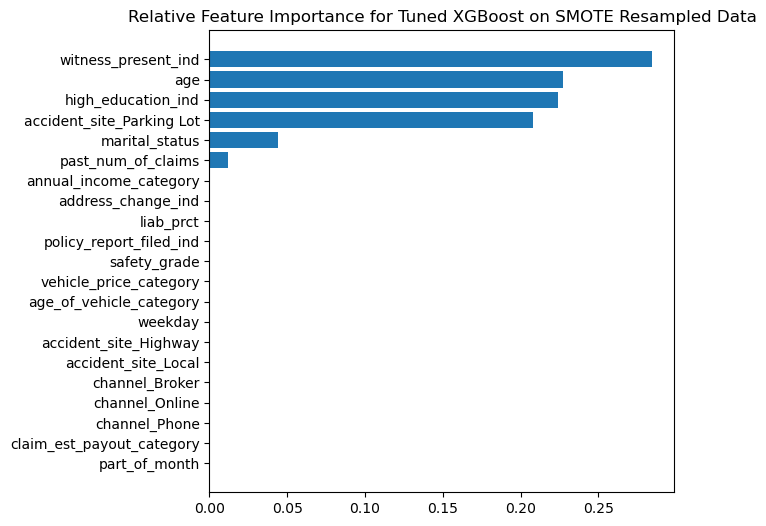

In [23]:
#Built-in Variable Importance
plt.figure(figsize=(6,6))


xgb_resampled_tuned_importances = xgb_resampled_tuned.feature_importances_
order = np.argsort(xgb_resampled_tuned_importances)
plt.barh(range(len(xgb_resampled_tuned_importances)),
         xgb_resampled_tuned_importances[order],
         tick_label=x_train_resampled.columns[order])
plt.title("Relative Feature Importance for Tuned XGBoost on SMOTE Resampled Data")

From the results of the built-in feature importance, we can see that the relatively important features for tuned XGBoost on SMOTE Resampled data are <br>[witness_present_ind, age, high_education_ind, accident_site_Parking Lot, marital_status, past_num_of_claims] in descending order.

<h3> Permutation

In [12]:
i_permutation_xgb_resampled_tuned = permutation_importance(xgb_resampled_tuned, x_test, y_test,
                           n_repeats=30,
                           random_state=0)

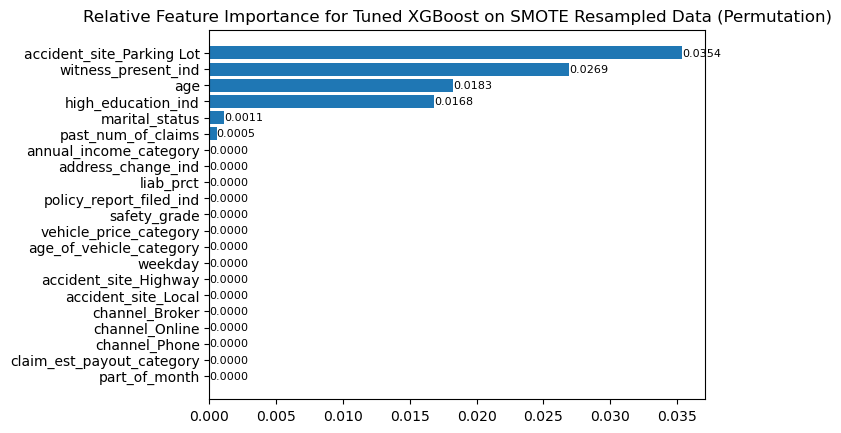

In [16]:
xgb_resampled_tuned_all_importances = i_permutation_xgb_resampled_tuned['importances_mean']
order = np.argsort(xgb_resampled_tuned_all_importances)
plt.barh(range(len(xgb_resampled_tuned_all_importances)),
         xgb_resampled_tuned_all_importances[order],
         tick_label=x_train_resampled.columns[order])

# Add labels to the bars
for index, value in enumerate(xgb_resampled_tuned_all_importances[order]):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=8)

plt.title("Relative Feature Importance for Tuned XGBoost on SMOTE Resampled Data (Permutation)")
plt.show()

From the results of the permutation feature importance, we can see that the relatively important features for tuned XGBoost on SMOTE Resampled data are <br>[accident_site_Parking Lot, witness_present_ind, age, high_education_ind, marital_status, past_num_of_claims] in descending order.<br>
This aligns with out findings in the exploration of the built-in relative feature importance. The only difference is that 'accident_site_Parking Lot' is considered as the most important feature in permutation while it is considered as the 4th important feature in built-in relative feature importance.

<h3> SHAP

In [62]:
shap.initjs()

In [63]:
xgb_resampled_tuned_explainer = shap.TreeExplainer(xgb_resampled_tuned, x_train_resampled, feature_perturbation="interventional")

[20:14:32] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [64]:
shap_values = xgb_resampled_tuned_explainer.shap_values(x_test)

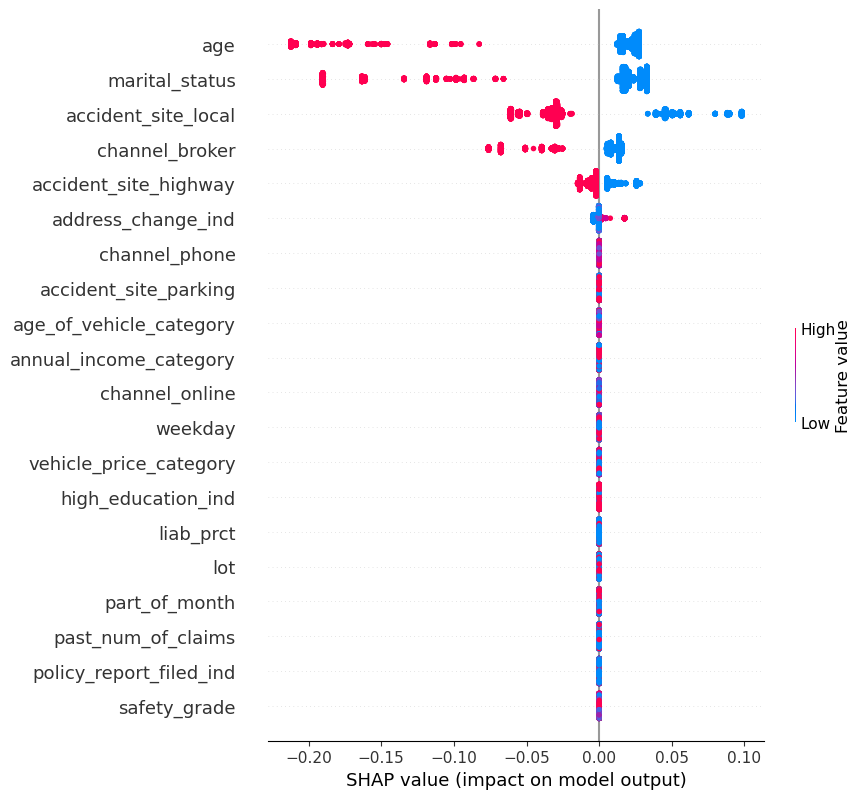

In [65]:
shap.summary_plot(shap_values, x_test, feature_names=vect.get_feature_names_out())

From the results of SHAP, we can see that the relatively important features for tuned XGBoost on SMOTE Resampled data are:  <br>
[age, marital_status, accident_site_local, channel_broker, accident_site_highway, address_change_ind] in descending order.<br>
This mostly does not align with our findings in the exploration of the built-in relative feature importance and permutation. This is because SHAP naturally captures interactions between features. SHAP values consider the contribution of each feature within the context of all possible combinations of features, while permutation generally does not explicitly handle feature interactions. The impact of permuting a single feature may not fully account for the interactions it has with other features.

<h3> Conclusion

Given our primary focus on conducting a comprehensive, model-agnostic evaluation of feature importance, prioritizing simplicity and efficiency, we consider the outcomes of permutation importance ([witness_present_ind, age, high_education_ind, accident_site_Parking Lot, marital_status, past_num_of_claims] in descending order) as the definitive set of crucial features deserving attention in subsequent analyses. 

However, acknowledging the nuanced insights offered by SHAP and its ability to elucidate intricate relationships among features, we also recognize the imperative need to incorporate the detailed explanations provided by SHAP into our analytical framework. This balanced approach ensures that we not only leverage the efficiency of permutation importance but also benefit from the nuanced understanding of feature contributions that SHAP offers.